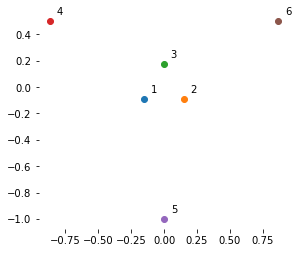

In [23]:
import numpy as np
import matplotlib.pyplot as plt

arm_length = 1.0
arm_width = 0.3
reward_distance = 0.8
origin = np.array([0.0, 0.0])

# get three corners of a triangle
k1 = origin + arm_width/np.sqrt(3) * np.array([np.cos(np.pi/2+2*np.pi/3), np.sin(np.pi/2+2*np.pi/3)])
k2 = origin + arm_width/np.sqrt(3) * np.array([np.cos(np.pi/2+4*np.pi/3), np.sin(np.pi/2+4*np.pi/3)])
k3 = origin + arm_width/np.sqrt(3) * np.array([np.cos(np.pi/2), np.sin(np.pi/2)])

# get the endpoints of the arm
k4 = origin + arm_length * np.array([np.cos(np.pi/6+2*np.pi/3), np.sin(np.pi/6+2*np.pi/3)])
k5 = origin + arm_length * np.array([np.cos(np.pi/6+4*np.pi/3), np.sin(np.pi/6+4*np.pi/3)])
k6 = origin + arm_length * np.array([np.cos(np.pi/6), np.sin(np.pi/6)])

# plot the triangles
for i,k in enumerate([k1, k2, k3, k4, k5, k6]):
    plt.plot(k[0], k[1], 'o')
    plt.text(k[0] + 0.05, k[1] + 0.05, str(i+1))

plt.gca().set_aspect('equal')
plt.box()
plt.show()

points = np.array([k1, k2, k3, k4, k5, k6])

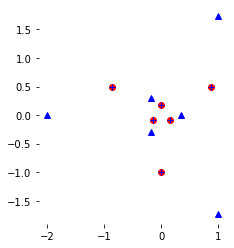

In [30]:
# generate a random affine transformation using skimage.transform

from skimage.transform import AffineTransform

test_transform = AffineTransform(scale=(2.0, 2.0), rotation=np.pi/6, translation=(0.0, 0.0))
transformed_points = test_transform(points)

# estimate the inverse transform
from skimage.transform import estimate_transform

inverse_transform = estimate_transform('affine', transformed_points, points)
inverse_transformed_points = inverse_transform(transformed_points)

# plot the inverse transformed points
plt.plot(points[:,0], points[:,1], 'ro')
plt.plot(transformed_points[:,0], transformed_points[:,1], 'b^')
plt.plot(inverse_transformed_points[:,0], inverse_transformed_points[:,1], 'b+')

plt.gca().set_aspect('equal')
plt.box()
plt.show()

